In [118]:
import pandas as pd
from datetime import datetime

# Read the CSV file
df = pd.read_csv('C:\\Users\\37424\\Desktop\\fake_transactional_data_24.csv')
unique_users = df['from_totally_fake_account'].nunique()
unique_merchants = df['to_randomly_generated_account'].nunique()
print(f'User: {unique_users}')
print(f'Merchants: {unique_merchants}')

User: 8142
Merchants: 14300


In [119]:
df['from_totally_fake_account'] = df['from_totally_fake_account'].astype(int)
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')

In [120]:
grouped = df.groupby('from_totally_fake_account')
sorted_users = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df = pd.concat(sorted_users)
aa = sorted_df['from_totally_fake_account'].count()
print(aa)
print(sorted_df.head(10).to_string(index=False))
sorted_df.to_csv('users_sorted_dataframe.csv', index=False)

10148280
 from_totally_fake_account  monopoly_money_amount to_randomly_generated_account not_happened_yet_date
                      1000                   8.99             STREAMING_SERVICE            2025-01-01
                      1000                   2.40           GOURMET_COFFEE_SHOP            2025-01-01
                      1000                   2.55           GOURMET_COFFEE_SHOP            2025-01-01
                      1000                   2.20           A_LOCAL_COFFEE_SHOP            2025-01-01
                      1000                  13.06                     LOCAL_PUB            2025-01-01
                      1000                   4.50                          CAFE            2025-01-02
                      1000                   2.45           HIPSTER_COFFEE_SHOP            2025-01-02
                      1000                   2.20           GOURMET_COFFEE_SHOP            2025-01-02
                      1000                   2.65       PRETENTIOUS_COFFE

In [121]:
df['month'] = df['not_happened_yet_date'].dt.month
monthly_expenses = df.groupby(['from_totally_fake_account', 'month'])['monopoly_money_amount'].sum().reset_index()

monthly_expenses.rename(columns={'monopoly_money_amount': 'total_monthly_spent'}, inplace=True)

print(monthly_expenses.head(10).to_string(index=False))
monthly_expenses.to_csv('monthly_expenses.csv', index=False)

 from_totally_fake_account  month  total_monthly_spent
                      1000      1              2576.52
                      1000      2              2882.33
                      1000      3              2341.74
                      1000      4              1876.77
                      1000      5              1843.29
                      1000      6              2553.40
                      1000      7              2949.72
                      1000      8              2503.66
                      1000      9              2173.79
                      1000     10              2502.73


In [122]:
df['year'] = df['not_happened_yet_date'].dt.year
year_expenses = df.groupby(['from_totally_fake_account', 'year'])['monopoly_money_amount'].sum().reset_index()

year_expenses.rename(columns={'monopoly_money_amount': 'total_year_spent'}, inplace=True)

print(year_expenses.head(10).to_string(index=False))
year_expenses.to_csv('year_expenses.csv', index=False)

 from_totally_fake_account  year  total_year_spent
                      1000  2025          28698.51
                      1002  2025          15622.97
                      1006  2025          18778.19
                      1018  2025          15612.21
                      1053  2025          19444.57
                      1059  2025          17491.45
                      1071  2025          13505.42
                      1078  2025          14967.27
                      1086  2025          20213.62
                      1087  2025          15920.14


In [123]:
grouped = df.groupby('to_randomly_generated_account')
sorted_merchants = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df2 = pd.concat(sorted_merchants)
print(sorted_df2.head(10).to_string(index=False))

 from_totally_fake_account  monopoly_money_amount to_randomly_generated_account not_happened_yet_date  month  year
                      5403                   6.00                          1000            2025-01-04      1  2025
                      5403                   6.00                          1000            2025-01-04      1  2025
                      5403                   6.00                          1000            2025-01-04      1  2025
                     77084                   4.50                          1000            2025-01-05      1  2025
                     77084                   4.50                          1000            2025-01-05      1  2025
                     77084                 334.00                          1000            2025-01-07      1  2025
                     56140                 334.00                          1000            2025-01-07      1  2025
                     41718                   5.50                          1000 

In [124]:
columns = list(df.columns)
columns.remove('to_randomly_generated_account')
new_columns_order = ['to_randomly_generated_account'] + columns
df = df[new_columns_order]
df_filtered = df[~df['to_randomly_generated_account'].str.isdigit()]
# print(df_filtered.head(1000).to_string(index=False))
grouped = df_filtered.groupby('to_randomly_generated_account')
sorted_merchants = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df2 = pd.concat(sorted_merchants)
aa = sorted_df2['from_totally_fake_account'].count()
print(f'Records: {aa}')
unique_merchants = sorted_df['to_randomly_generated_account'].nunique()
print(f'Merchants: {unique_merchants}')
print(sorted_df2.head(20).to_string(index=False))
sorted_df2.to_csv('merchants_sorted_dataframe.csv', index=False)

Records: 7615517
Merchants: 14300
to_randomly_generated_account  from_totally_fake_account  monopoly_money_amount not_happened_yet_date  month  year
               ACCESSORY_SHOP                      95445                   18.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      10179                   14.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      63705                   18.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      79889                   39.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      52591                   39.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      26805                   12.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      19533                   29.0            2025-01-02      1  2025
               ACCESSORY_SHOP                 

In [125]:
sorted_df2['month'] = sorted_df2['not_happened_yet_date'].dt.month
monthly_incomes = sorted_df2.groupby(['to_randomly_generated_account', 'month'])['monopoly_money_amount'].sum().reset_index()

monthly_incomes.rename(columns={'monopoly_money_amount': 'total_monthly_income'}, inplace=True)
print(monthly_incomes.head(10).to_string(index=False))
monthly_incomes.to_csv('monthly_incomes.csv', index=False)

to_randomly_generated_account  month  total_monthly_income
               ACCESSORY_SHOP      1                6238.0
               ACCESSORY_SHOP      2                6213.0
               ACCESSORY_SHOP      3                6545.0
               ACCESSORY_SHOP      4                5867.0
               ACCESSORY_SHOP      5                6447.0
               ACCESSORY_SHOP      6                6553.0
               ACCESSORY_SHOP      7                6481.0
               ACCESSORY_SHOP      8                6585.0
               ACCESSORY_SHOP      9                5778.0
               ACCESSORY_SHOP     10                6186.0


In [126]:
sorted_df2['year'] = sorted_df2['not_happened_yet_date'].dt.year
year_incomes = sorted_df2.groupby(['to_randomly_generated_account', 'year'])['monopoly_money_amount'].sum().reset_index()

year_incomes.rename(columns={'monopoly_money_amount': 'total_year_incomes'}, inplace=True)

print(year_incomes.head(10).to_string(index=False))
year_expenses.to_csv('year_incomes.csv', index=False)

to_randomly_generated_account  year  total_year_incomes
               ACCESSORY_SHOP  2025            74862.00
                       A_CAFE  2025          1144734.25
          A_LOCAL_COFFEE_SHOP  2025          1141932.30
                A_SUPERMARKET  2025          5652778.58
                          BAR  2025          8458081.50
                     BOOKSHOP  2025           324530.00
                      BUTCHER  2025          2097495.50
                     BUTCHERS  2025           294408.00
                         CAFE  2025           489245.50
              CHILDRENDS_SHOP  2025           916095.00


In [127]:
current_date = sorted_df2['not_happened_yet_date'].max()

rfm = sorted_df2.groupby(['to_randomly_generated_account', 'from_totally_fake_account']).agg({
    'not_happened_yet_date': lambda x: (current_date - x.max()).days,  # Recency
    'from_totally_fake_account': 'count',                                        # Frequency
    'monopoly_money_amount': 'sum'                                    # Monetary
}).rename(columns={
    'not_happened_yet_date': 'recency',
    'from_totally_fake_account': 'frequency',
    'monopoly_money_amount': 'monetary'
}).reset_index()

# Calculate quantiles for frequency and monetary
quantiles = rfm[['recency','frequency', 'monetary']].quantile(q=[0.25, 0.5, 0.75])

# Define scoring functions
def recency_score(x, quantiles):
    if x <= quantiles['recency'][0.25]:
        return 4
    elif x <= quantiles['recency'][0.5]:
        return 3
    elif x <= quantiles['recency'][0.75]:
        return 2
    else:
        return 1

def frequency_score(x, quantiles):
    if x <= quantiles['frequency'][0.25]:
        return 1
    elif x <= quantiles['frequency'][0.5]:
        return 2
    elif x <= quantiles['frequency'][0.75]:
        return 3
    else:
        return 4

def monetary_score(x, quantiles):
    if x <= quantiles['monetary'][0.25]:
        return 1
    elif x <= quantiles['monetary'][0.5]:
        return 2
    elif x <= quantiles['monetary'][0.75]:
        return 3
    else:
        return 4

# Apply scoring functions to the respective columns
rfm['r_score'] = rfm['recency'].apply(recency_score, args=(quantiles,))
rfm['f_score'] = rfm['frequency'].apply(frequency_score, args=(quantiles,))
rfm['m_score'] = rfm['monetary'].apply(monetary_score, args=(quantiles,))
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
# Final RFM table
rfm = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'r_score', 'f_score', 'm_score','rfm_score']]   #The smaller the value, the closer the time is

print(rfm.head(10).to_string(index=False))
rfm.to_csv('RFM_analysis_of_each_user_corresponding_to_the_merchant.csv', index=False)

to_randomly_generated_account  from_totally_fake_account  r_score  f_score  m_score rfm_score
               ACCESSORY_SHOP                       1357        1        2        2       122
               ACCESSORY_SHOP                       1607        3        3        3       333
               ACCESSORY_SHOP                       1623        1        3        3       133
               ACCESSORY_SHOP                       1828        2        2        2       222
               ACCESSORY_SHOP                       1931        2        3        4       234
               ACCESSORY_SHOP                       2090        2        2        3       223
               ACCESSORY_SHOP                       2274        2        2        2       222
               ACCESSORY_SHOP                       2719        3        3        3       333
               ACCESSORY_SHOP                       2844        2        3        3       233
               ACCESSORY_SHOP                       3017    

In [128]:
# filtered_df = sorted_df2[
#     (sorted_df2['from_totally_fake_account'] == 1607) &
#     (sorted_df2['to_randomly_generated_account'] == 'ACCESSORY_SHOP')
# ]
#
# # Now we can calculate the total money spent, the number of visits, and the date of the last visit.
# total_money_spent = filtered_df['monopoly_money_amount'].sum()
# number_of_visits = filtered_df.shape[0]
# date_of_last_visit = filtered_df['not_happened_yet_date'].max()
#
# total_money_spent, number_of_visits, date_of_last_visit

In [129]:
weights = rfm['from_totally_fake_account']
r_weighted_average = (rfm['r_score'] * weights).sum() / weights.sum()
f_weighted_average = (rfm['f_score'] * weights).sum() / weights.sum()
m_weighted_average = (rfm['m_score'] * weights).sum() / weights.sum()

print(f'R weighted average: {r_weighted_average}')
print(f'F weighted average: {f_weighted_average}')
print(f'M weighted average: {m_weighted_average}')

rfm['r_value'] = (rfm['r_score'] > r_weighted_average).astype(int)
rfm['f_value'] = (rfm['f_score'] > f_weighted_average).astype(int)
rfm['m_value'] = (rfm['m_score'] > m_weighted_average).astype(int)
rfm['rfm_value'] = rfm['r_value'].astype(str) + rfm['f_value'].astype(str) + rfm['m_value'].astype(str)
rfm2 = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'r_value', 'f_value', 'm_value','rfm_value']]   #The smaller the value, the closer the time is
print(rfm2.head(10).to_string(index=False))
rfm.to_csv('RFM_with_weighted_average.csv', index=False)

R weighted average: 2.5107906870016614
F weighted average: 2.4436360922633353
M weighted average: 2.499355487343165
to_randomly_generated_account  from_totally_fake_account  r_value  f_value  m_value rfm_value
               ACCESSORY_SHOP                       1357        0        0        0       000
               ACCESSORY_SHOP                       1607        1        1        1       111
               ACCESSORY_SHOP                       1623        0        1        1       011
               ACCESSORY_SHOP                       1828        0        0        0       000
               ACCESSORY_SHOP                       1931        0        1        1       011
               ACCESSORY_SHOP                       2090        0        0        1       001
               ACCESSORY_SHOP                       2274        0        0        0       000
               ACCESSORY_SHOP                       2719        1        1        1       111
               ACCESSORY_SHOP         

In [130]:
def assign_group(row):
    if row['r_value'] == 1 and row['f_value'] == 1 and row['m_value'] == 1:
        return 'Important value customers'
    elif row['r_value'] == 0 and row['f_value'] == 1 and row['m_value'] == 1:
        return 'Important recalled customers'
    elif row['r_value'] == 1 and row['f_value'] == 0 and row['m_value'] == 1:
        return 'Important development customers'
    elif row['r_value'] == 0 and row['f_value'] == 0 and row['m_value'] == 1:
        return 'Important retention customers'
    elif row['r_value'] == 1 and row['f_value'] == 1 and row['m_value'] == 0:
        return 'Potential customers'
    elif row['r_value'] == 1 and row['f_value'] == 0 and row['m_value'] == 0:
        return 'New customers'
    elif row['r_value'] == 0 and row['f_value'] == 1 and row['m_value'] == 0:
        return 'Generally maintain customers'
    elif row['r_value'] == 0 and row['f_value'] == 0 and row['m_value'] == 0:
        return 'Lost customers'

rfm2.loc[:, 'Customer group'] = rfm2.apply(assign_group, axis=1)
print(rfm2.head(10).to_string(index=False))
rfm2.to_csv('Merchant_RFM_customer_groups.csv', index=False)

C:\Users\37424\AppData\Local\Temp\ipykernel_23540\1477882220.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2.loc[:, 'Customer group'] = rfm2.apply(assign_group, axis=1)


to_randomly_generated_account  from_totally_fake_account  r_value  f_value  m_value rfm_value                Customer group
               ACCESSORY_SHOP                       1357        0        0        0       000                Lost customers
               ACCESSORY_SHOP                       1607        1        1        1       111     Important value customers
               ACCESSORY_SHOP                       1623        0        1        1       011  Important recalled customers
               ACCESSORY_SHOP                       1828        0        0        0       000                Lost customers
               ACCESSORY_SHOP                       1931        0        1        1       011  Important recalled customers
               ACCESSORY_SHOP                       2090        0        0        1       001 Important retention customers
               ACCESSORY_SHOP                       2274        0        0        0       000                Lost customers
        

In [131]:
# rfm[['r_score', 'f_score', 'm_score']].dtypes

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#
# #Perform independent clustering analysis on each merchant
# # for account in rfm['to_randomly_generated_account'].unique():
# #     print(f"Processing account: {account}")
#
# #Filter data for specific merchants
# # account_rfm = rfm[rfm['to_randomly_generated_account'] == account]
#
# #Data preprocessing - Standardized RFM values
# scaler = StandardScaler()
# # rfm_scaled = scaler.fit_transform(account_rfm[['r_score', 'f_score', 'm_score']])
# rfm_scaled = scaler.fit_transform(rfm[['r_score', 'f_score', 'm_score']])
# #Initialize SSE dictionary to store SSE for each k value
# sse = {}
#
# #Use Elbow Method to find the optimal K value and test K values from 1 to 10
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(rfm_scaled)
#     sse[k] = kmeans.inertia_  # 存储SSE (Sum of Squared Errors)
#
# #Draw a graph of SSE changing with k value
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# # plt.xlabel(f"Number of cluster for account {account}")
# plt.xlabel(f"Number of cluster")
# plt.ylabel("SSE")
# plt.show()
#
# #Select the optimal K value based on the graph
#
# k_opt = 3  #This value is the inflection point value in the elbow diagram
#
# #Applying K-Means clustering
# kmeans = KMeans(n_clusters=k_opt, random_state=42)
# clusters = kmeans.fit_predict(rfm_scaled)
# rfm['Cluster'] = clusters
#
# rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [133]:
# rfm_original = scaler.inverse_transform(rfm_scaled)
#
# #Create a new graph and a 3D subgraph
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
#
# #Assign data points to three-dimensional space
# xs = rfm_original[:, 0]  # Recency
# ys = rfm_original[:, 1]  # Frequency
# zs = rfm_original[:, 2]  # Monetary
#
# #Create a 3D scatter plot with colors defined by clustering labels
# scatter = ax.scatter(xs, ys, zs, c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolors='w')
#
# #Set chart titles and axis labels
# ax.set_title('3D RFM Clustering')
# ax.set_xlabel('Recency Score')
# ax.set_ylabel('Frequency Score')
# ax.set_zlabel('Monetary Score')
#
# plt.show()


In [134]:
# #Define clustering labels
# cluster_labels = {
#     0: 'High-Value Customers',
#     1: 'Low-Value/Risky Customers',
#     2: 'Developing Customers'
# }
#
# #Mapping labels to cluster numbers in DataFrame
# rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)
# rfm_Kmeans = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'rfm_score', 'Cluster', 'Cluster_Label']]
# print(rfm_Kmeans.head(1000).to_string(index=False))
# rfm_Kmeans.to_csv('RFM_with_K_means_customer_groups.csv', index=False)

Processing account: ACCESSORY_SHOP


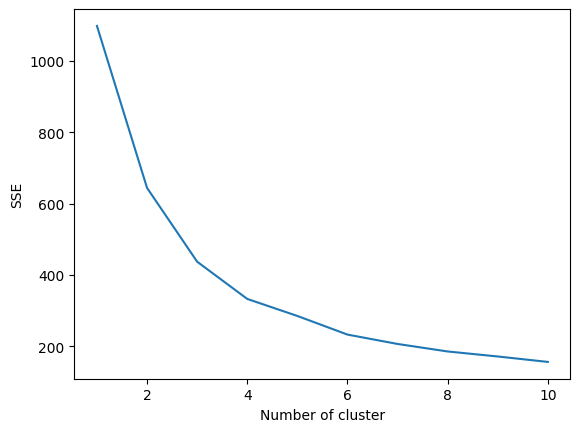

Merchant ACCESSORY_SHOP optimal k value is: 3
Processing account: A_CAFE


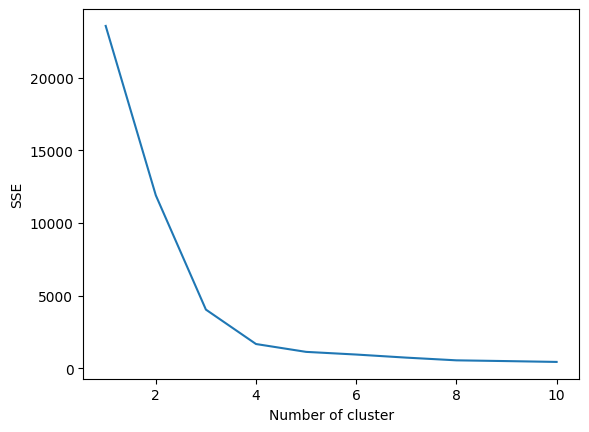

Merchant A_CAFE optimal k value is: 3
Processing account: A_LOCAL_COFFEE_SHOP


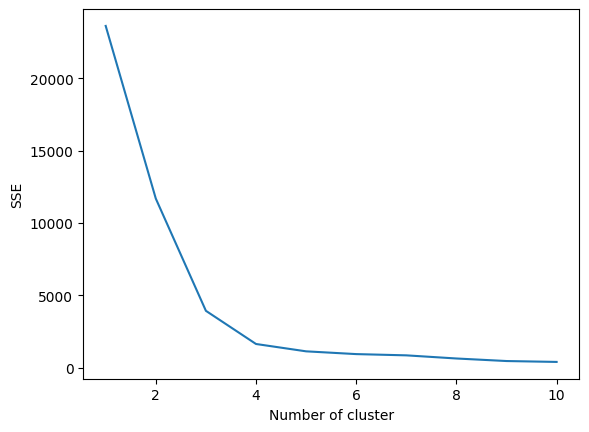

Merchant A_LOCAL_COFFEE_SHOP optimal k value is: 3
Processing account: A_SUPERMARKET


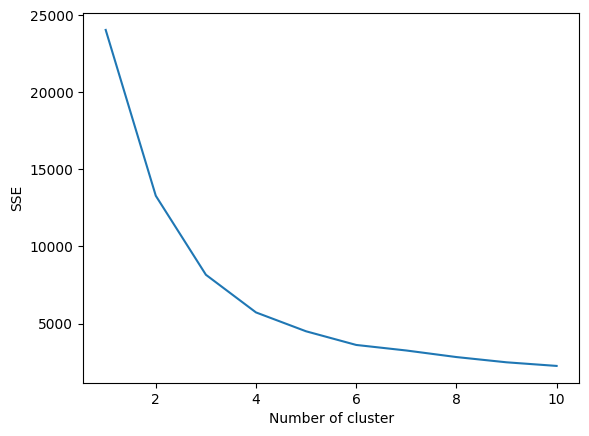

Merchant A_SUPERMARKET optimal k value is: 3
Processing account: BAR


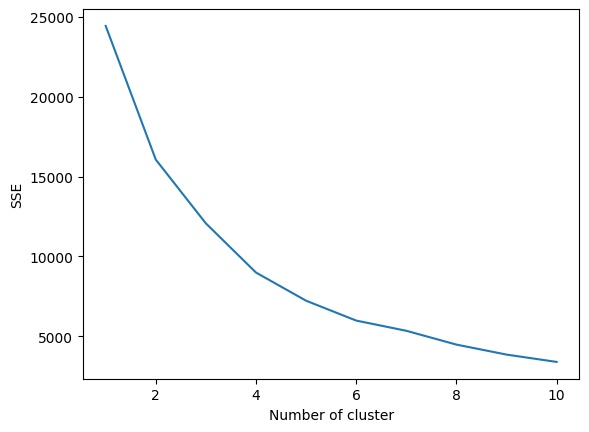

Merchant BAR optimal k value is: 3
Processing account: BOOKSHOP


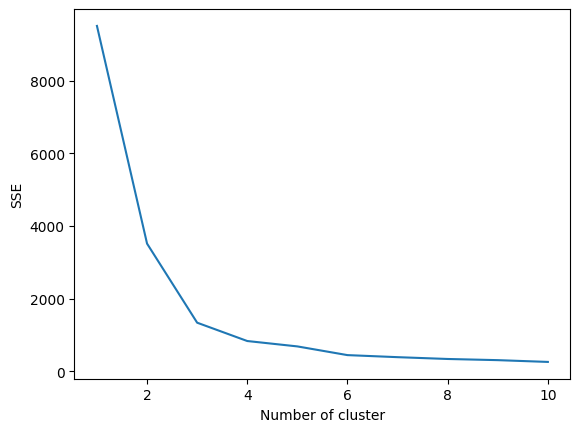

Merchant BOOKSHOP optimal k value is: 3
Processing account: BUTCHER


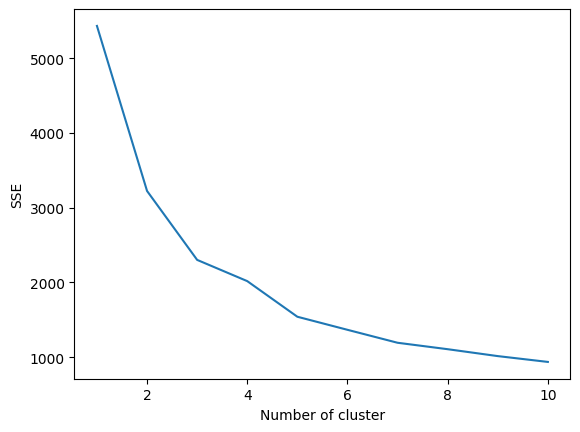

Merchant BUTCHER optimal k value is: 3
Processing account: BUTCHERS


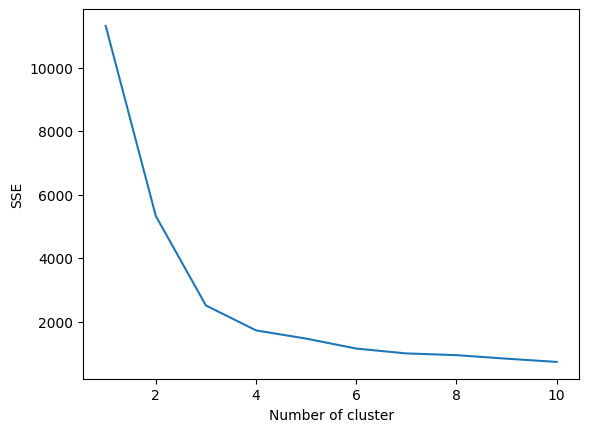

Merchant BUTCHERS optimal k value is: 3
Processing account: CAFE


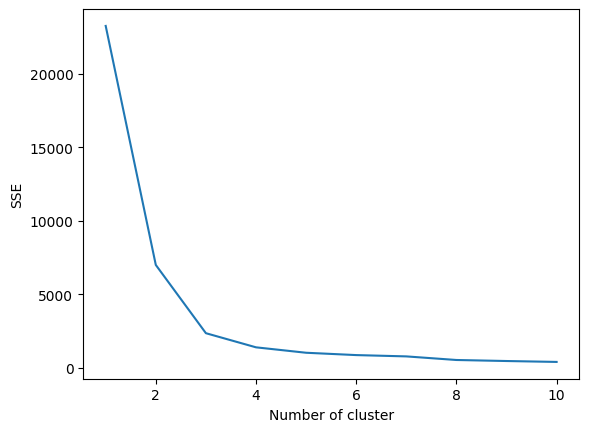

Merchant CAFE optimal k value is: 3
Processing account: CHILDRENDS_SHOP


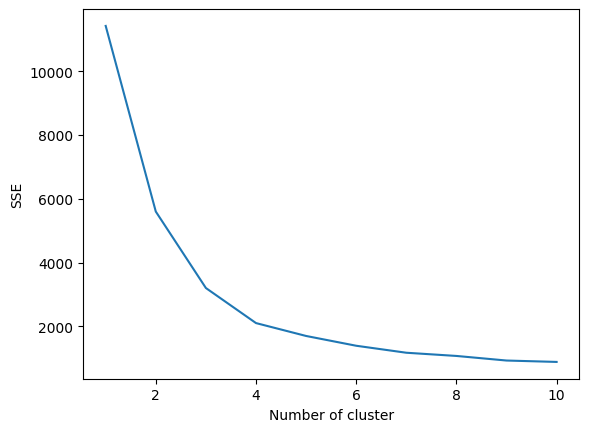

Merchant CHILDRENDS_SHOP optimal k value is: 3
Processing account: CHINESE_RESTAURANT


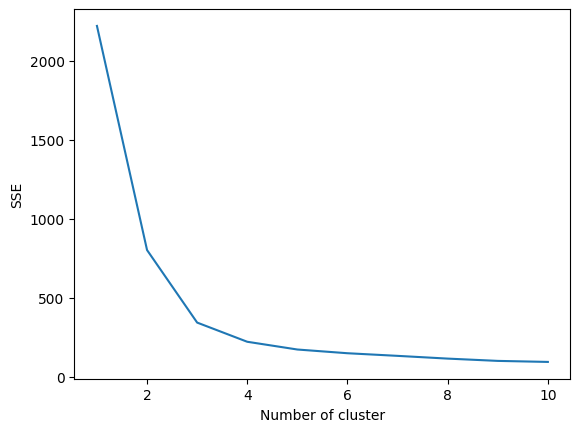

Merchant CHINESE_RESTAURANT optimal k value is: 3
Processing account: CHINESE_TAKEAWAY


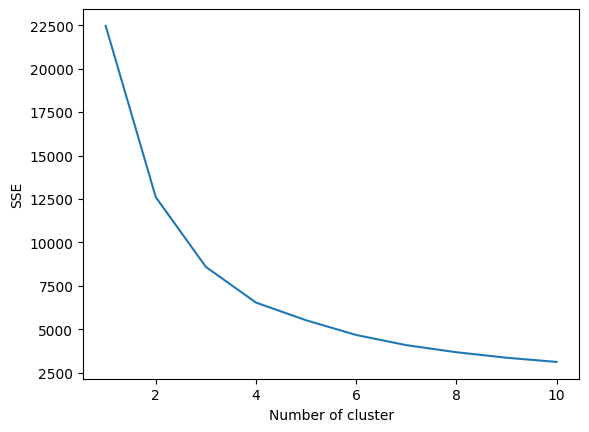

Merchant CHINESE_TAKEAWAY optimal k value is: 3
Processing account: CINEMA


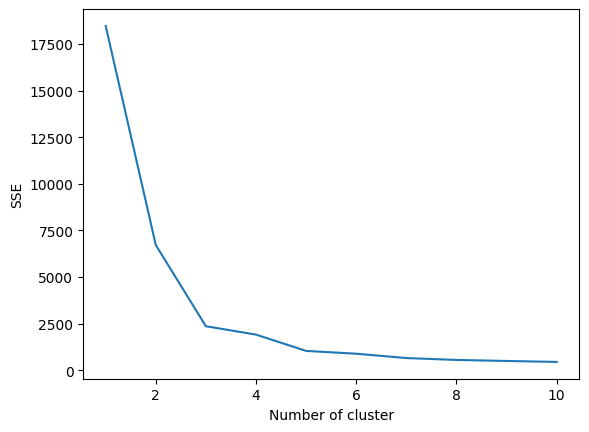

Merchant CINEMA optimal k value is: 3
Processing account: CLOTHES_SHOP


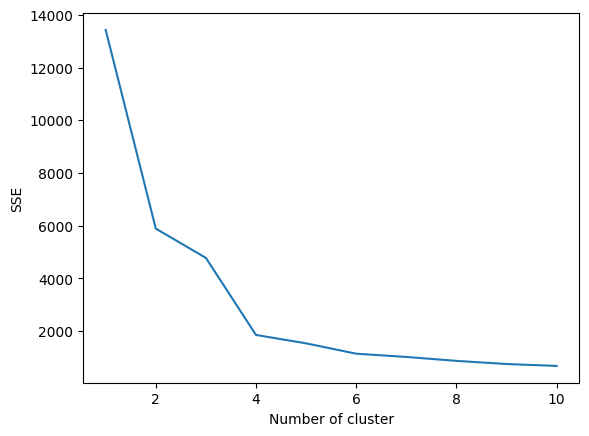

Merchant CLOTHES_SHOP optimal k value is: 3
Processing account: COCKTAIL_BAR


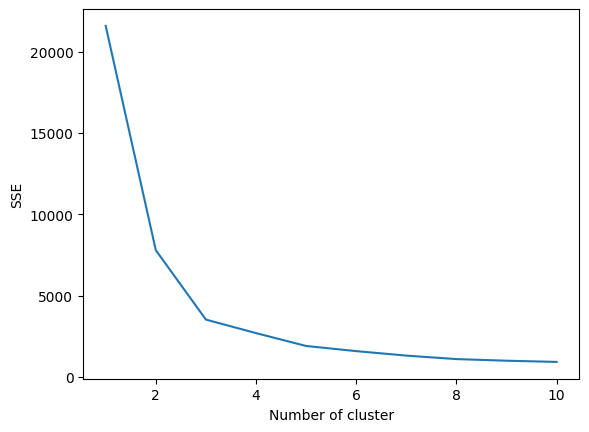

Merchant COCKTAIL_BAR optimal k value is: 3
Processing account: COFFEE_SHOP


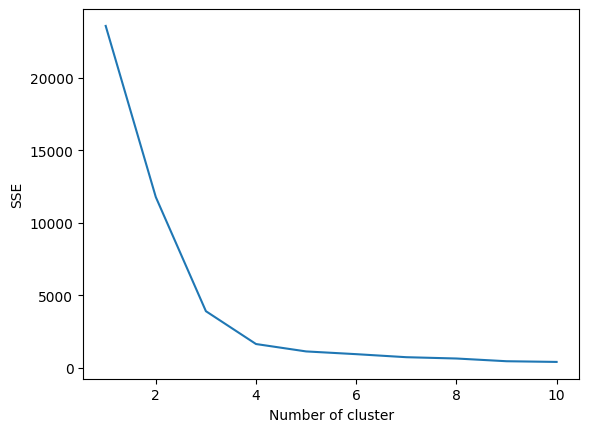

Merchant COFFEE_SHOP optimal k value is: 3
Processing account: COMIC_BOOK_SHOP


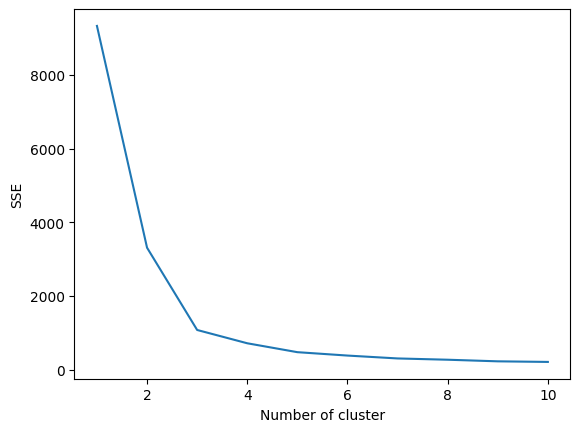

Merchant COMIC_BOOK_SHOP optimal k value is: 3
Processing account: COOKSHOP


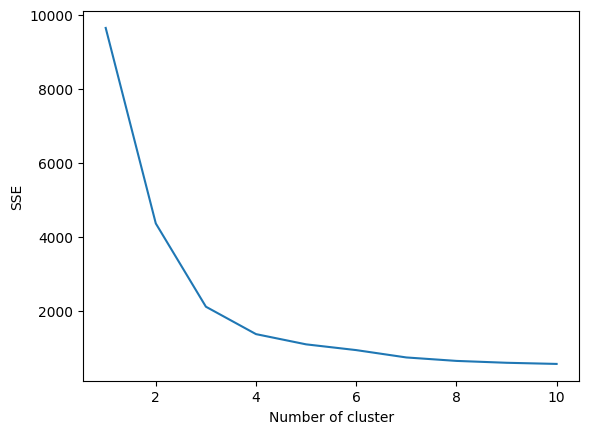

Merchant COOKSHOP optimal k value is: 3
Processing account: DEPARTMENT_STORE


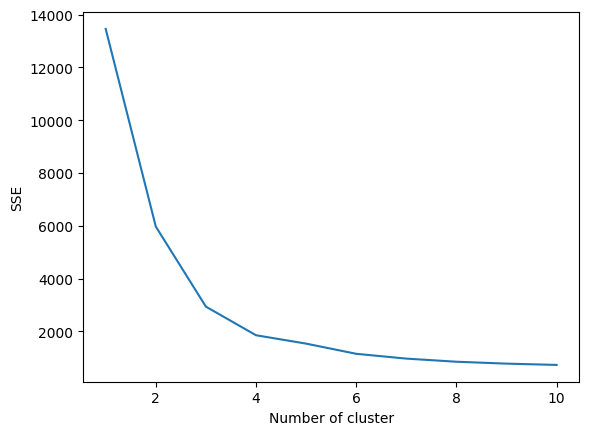

Merchant DEPARTMENT_STORE optimal k value is: 3
Processing account: DIY_STORE


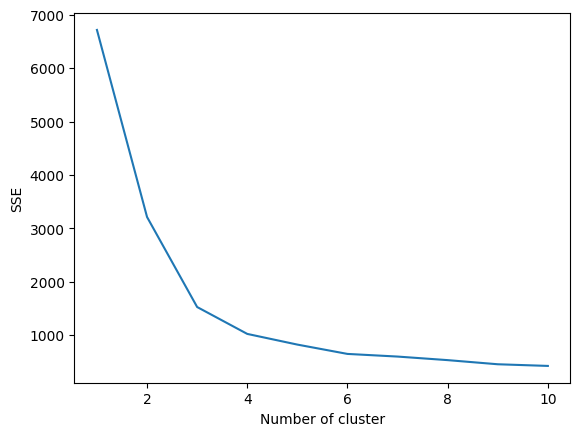

Merchant DIY_STORE optimal k value is: 3
Processing account: DVD_SHOP


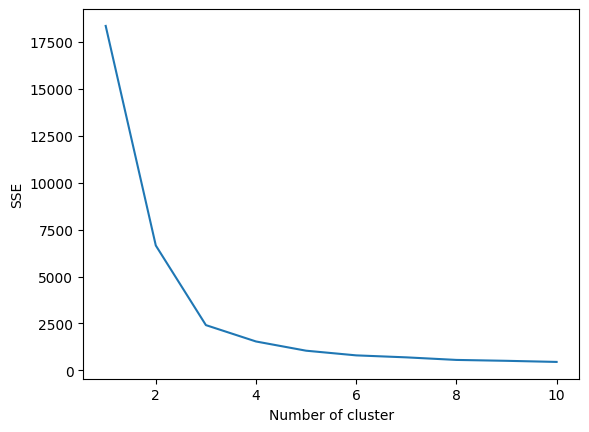

Merchant DVD_SHOP optimal k value is: 3
Processing account: ELECTRONICS_SHOP


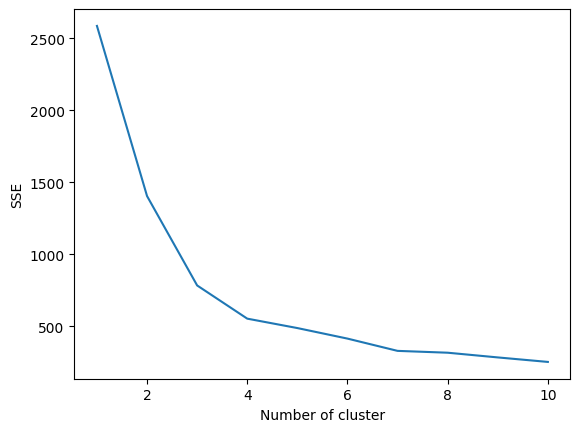

Merchant ELECTRONICS_SHOP optimal k value is: 3
Processing account: EXPRESS_SUPERMARKET


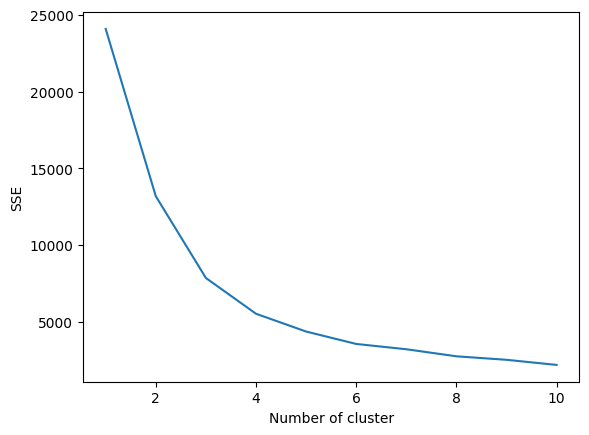

Merchant EXPRESS_SUPERMARKET optimal k value is: 3
Processing account: FASHIONABLE_SPORTSWARE_SHOP


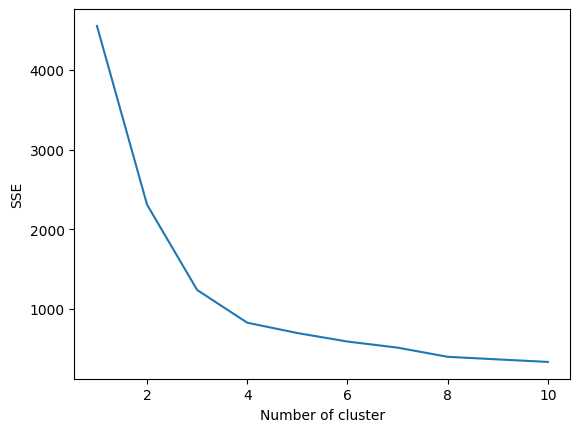

Merchant FASHIONABLE_SPORTSWARE_SHOP optimal k value is: 3
Processing account: FASHION_SHOP


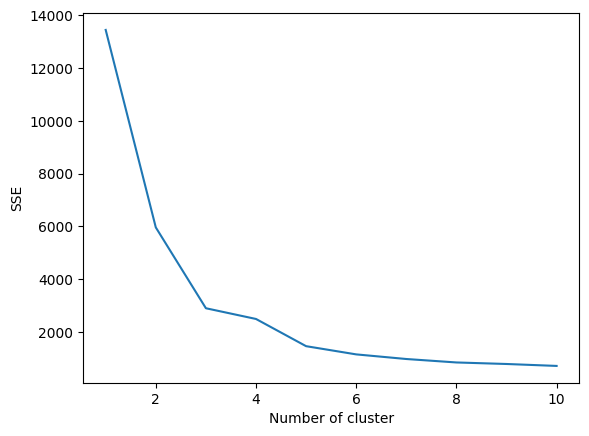

Merchant FASHION_SHOP optimal k value is: 3
Processing account: FLORIST


D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklear

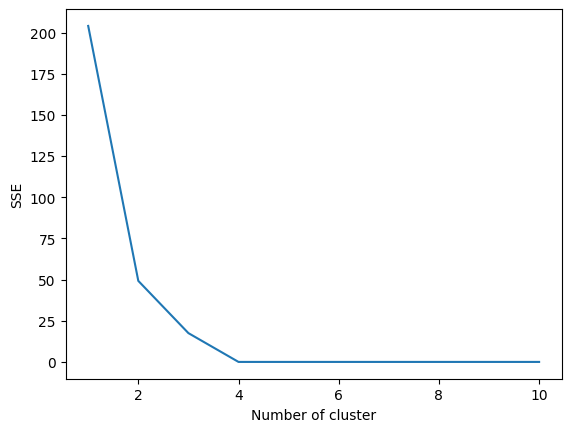

Merchant FLORIST optimal k value is: 3
Processing account: G&T_BAR


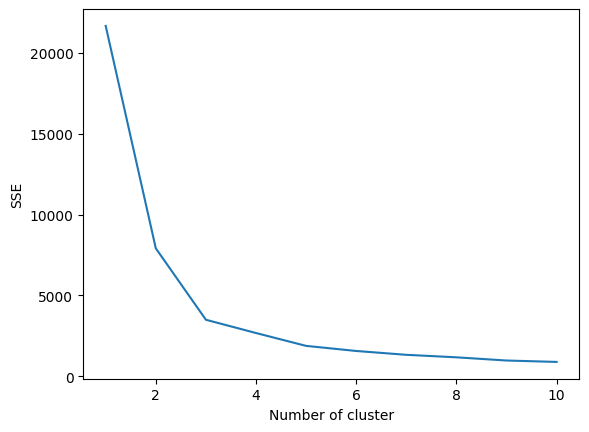

Merchant G&T_BAR optimal k value is: 3
Processing account: GAME_SHOP


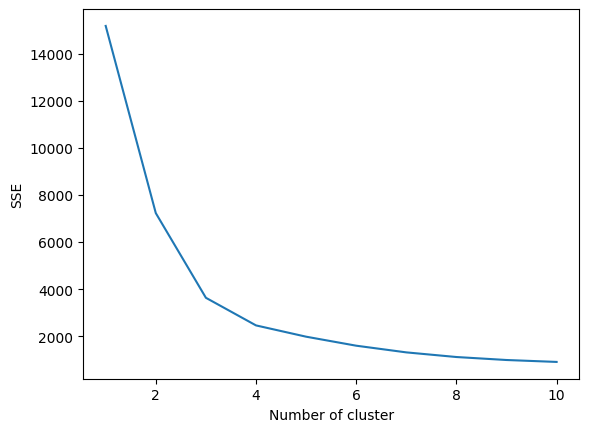

Merchant GAME_SHOP optimal k value is: 3
Processing account: GOURMET_COFFEE_SHOP


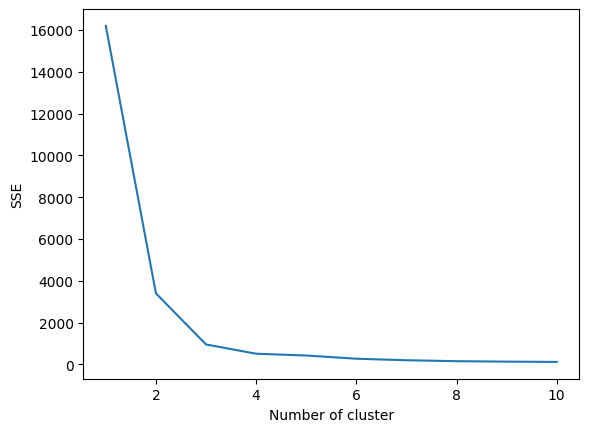

Merchant GOURMET_COFFEE_SHOP optimal k value is: 3
Processing account: GREENGROCER


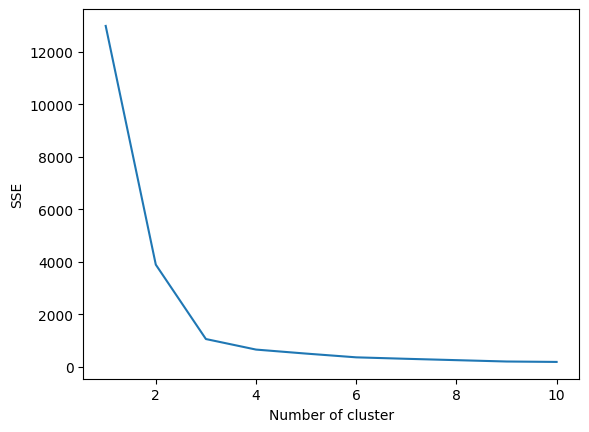

Merchant GREENGROCER optimal k value is: 3
Processing account: GYM


D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklear

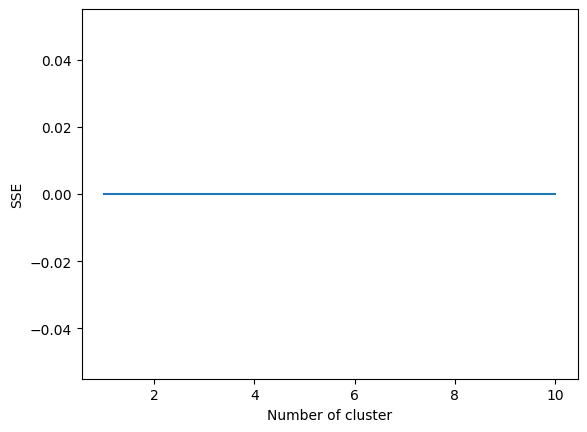

Merchant GYM optimal k value is: 3
Processing account: HIPSTER_COFFEE_SHOP


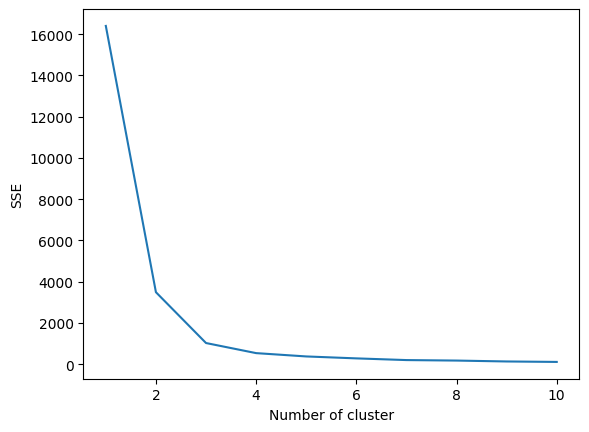

Merchant HIPSTER_COFFEE_SHOP optimal k value is: 3
Processing account: HIPSTER_ELECTRONICS_SHOP


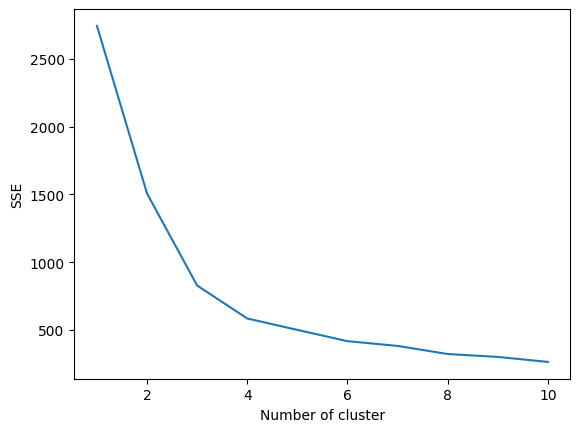

Merchant HIPSTER_ELECTRONICS_SHOP optimal k value is: 3
Processing account: HOME_IMPROVEMENT_STORE


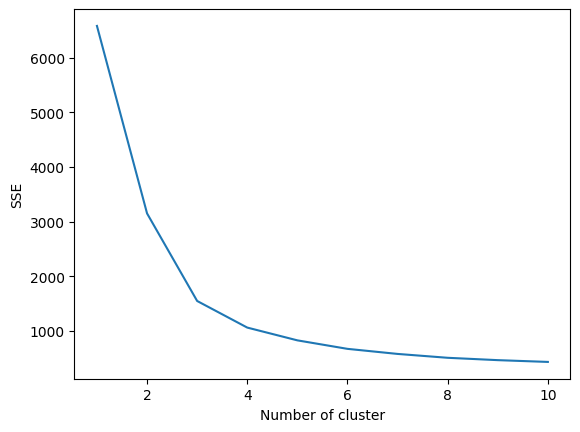

Merchant HOME_IMPROVEMENT_STORE optimal k value is: 3
Processing account: INDIAN_RESTAURANT


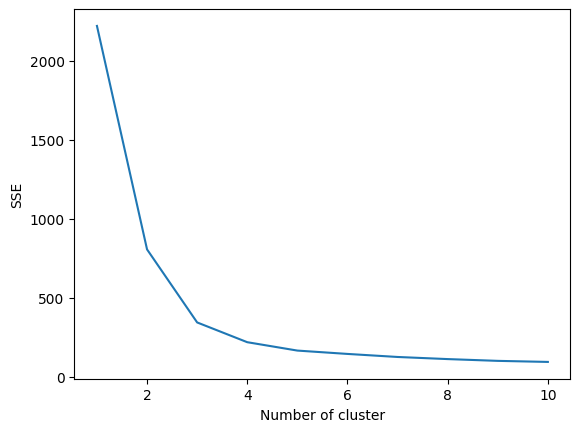

Merchant INDIAN_RESTAURANT optimal k value is: 3
Processing account: JEWLLERY_SHOP


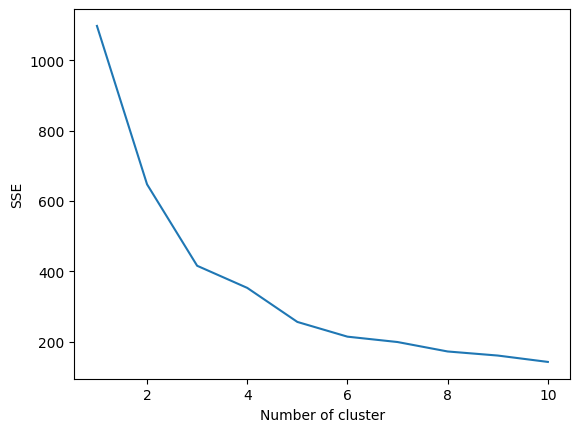

Merchant JEWLLERY_SHOP optimal k value is: 3
Processing account: KEBAB_SHOP


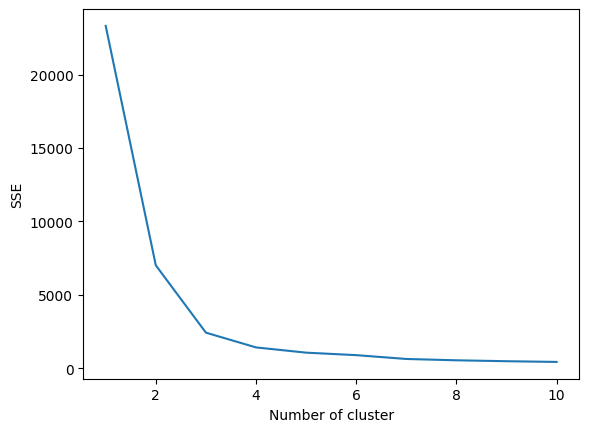

Merchant KEBAB_SHOP optimal k value is: 3
Processing account: KIDS_ACTIVITY_CENTRE


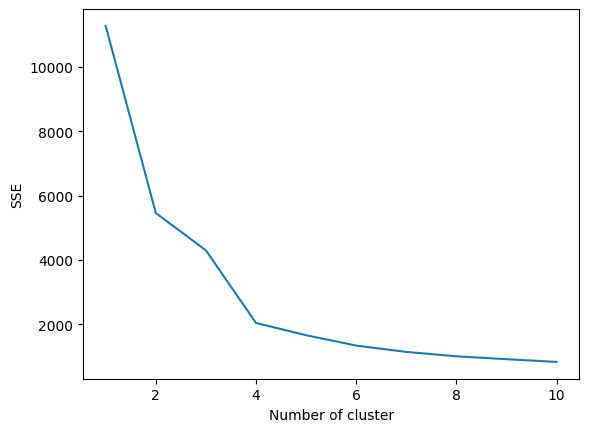

Merchant KIDS_ACTIVITY_CENTRE optimal k value is: 3
Processing account: KIDS_CLOTHING_SHOP


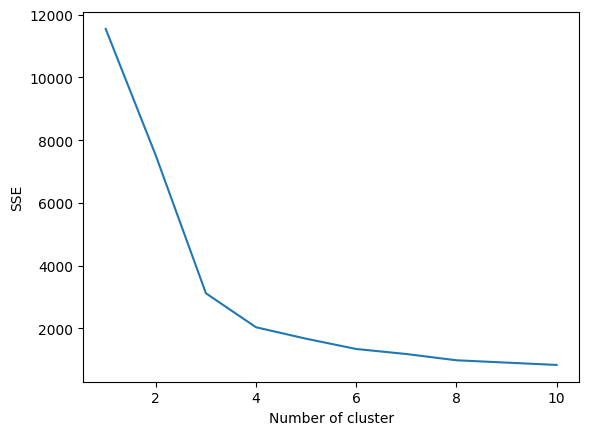

Merchant KIDS_CLOTHING_SHOP optimal k value is: 4
Processing account: LARGE_SUPERMARKET


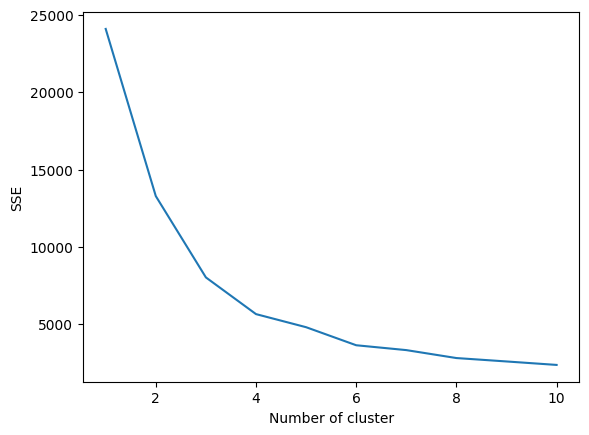

Merchant LARGE_SUPERMARKET optimal k value is: 3
Processing account: LIQUOR_STORE


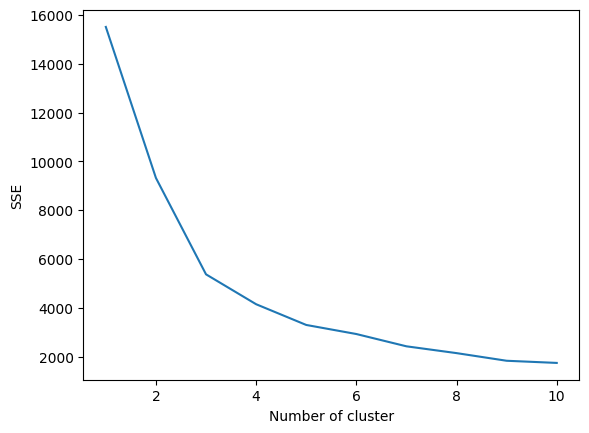

Merchant LIQUOR_STORE optimal k value is: 3
Processing account: LOCAL_BOOKSHOP


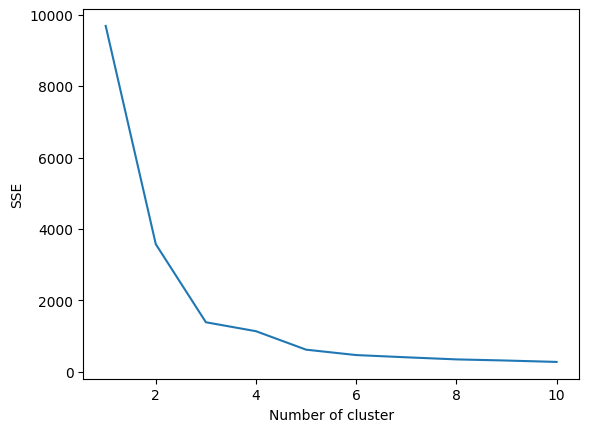

Merchant LOCAL_BOOKSHOP optimal k value is: 3
Processing account: LOCAL_PUB


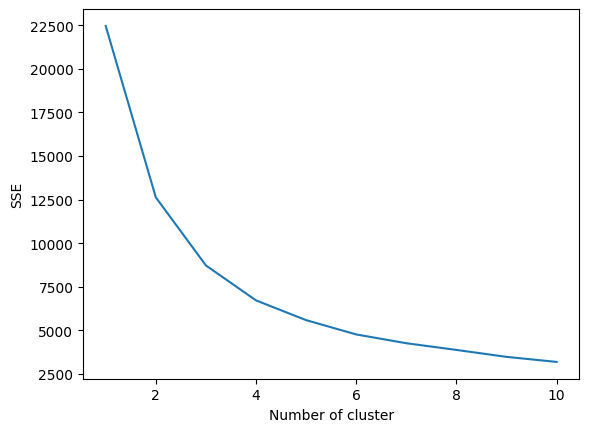

Merchant LOCAL_PUB optimal k value is: 3
Processing account: LOCAL_RESTAURANT


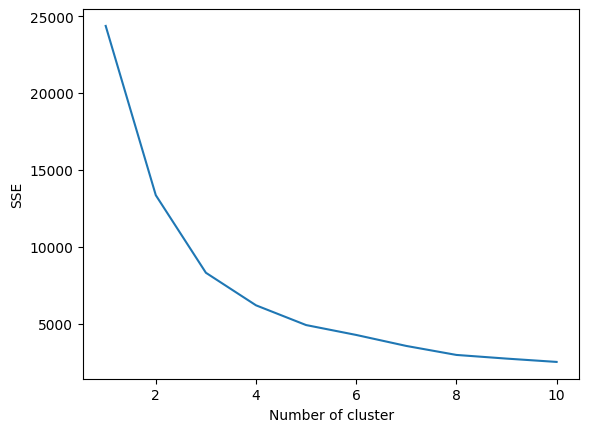

Merchant LOCAL_RESTAURANT optimal k value is: 3
Processing account: LOCAL_WATERING_HOLE


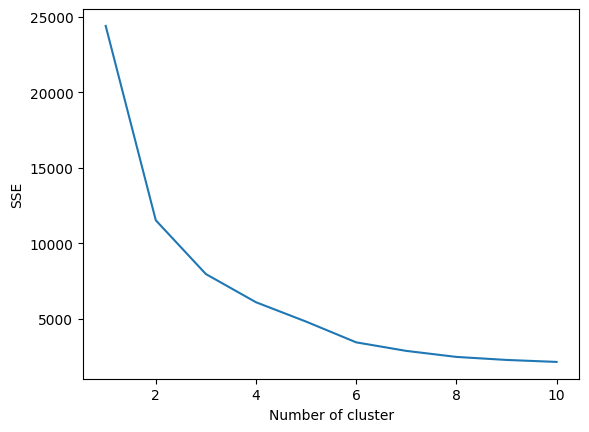

Merchant LOCAL_WATERING_HOLE optimal k value is: 3
Processing account: LUNCH_PLACE


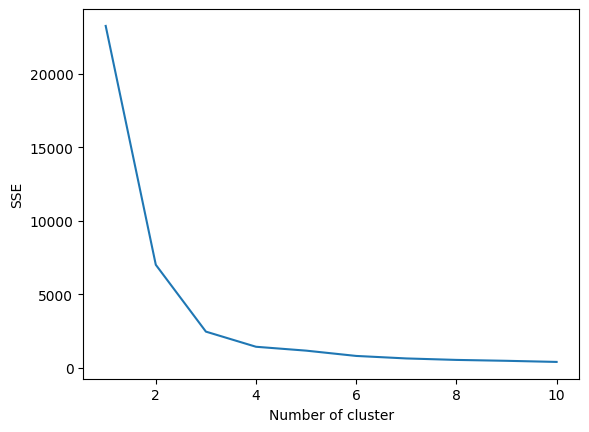

Merchant LUNCH_PLACE optimal k value is: 3
Processing account: LUNCH_VAN


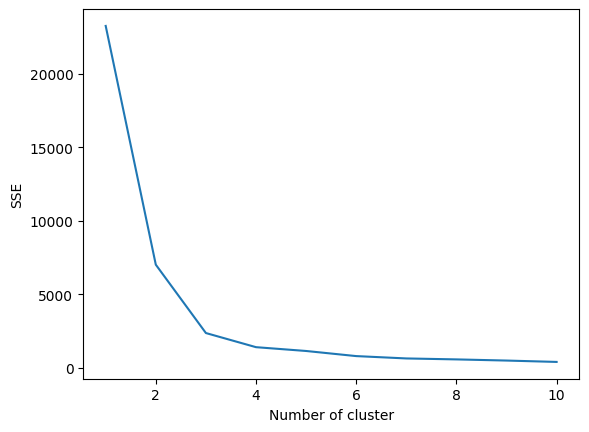

Merchant LUNCH_VAN optimal k value is: 3
Processing account: NERDY_BOOK_STORE


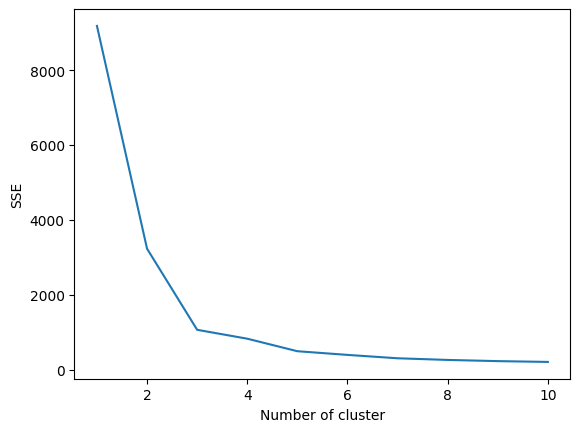

Merchant NERDY_BOOK_STORE optimal k value is: 3
Processing account: PET_SHOP


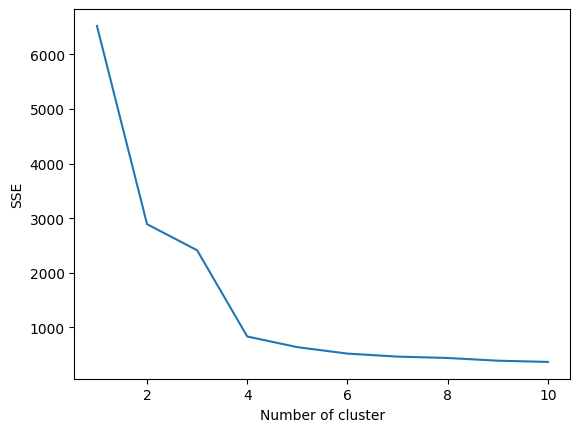

Merchant PET_SHOP optimal k value is: 3
Processing account: PET_TOY_SHOP


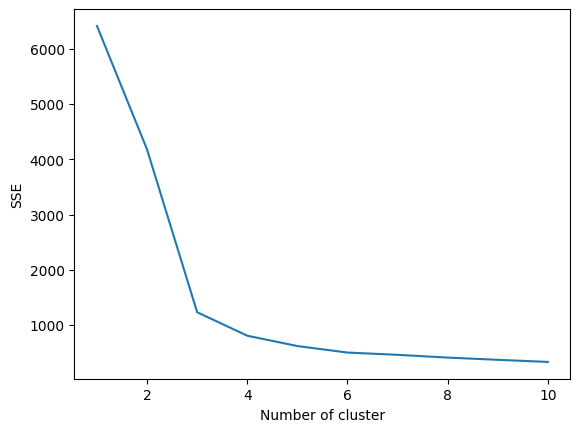

Merchant PET_TOY_SHOP optimal k value is: 4
Processing account: PRETENTIOUS_COFFEE_SHOP


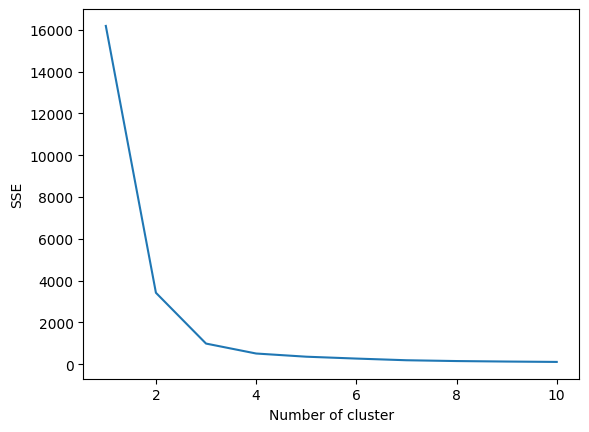

Merchant PRETENTIOUS_COFFEE_SHOP optimal k value is: 3
Processing account: PUB


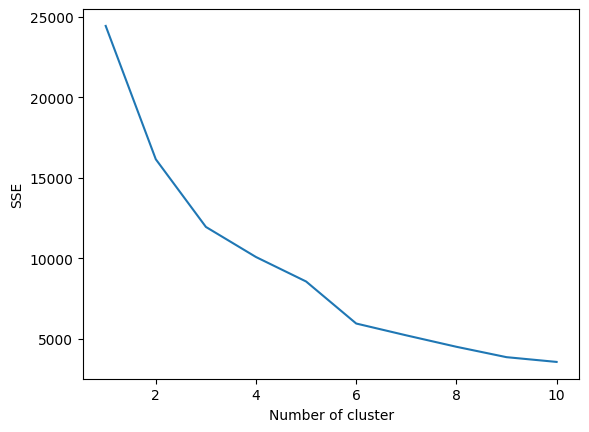

Merchant PUB optimal k value is: 3
Processing account: RESTAURANT


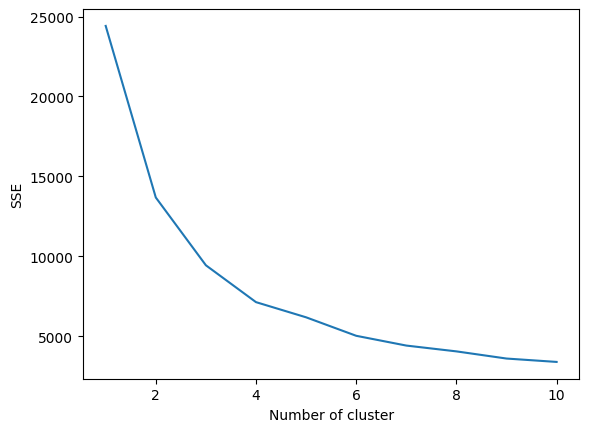

Merchant RESTAURANT optimal k value is: 3
Processing account: RESTAURANT_VOUCHER


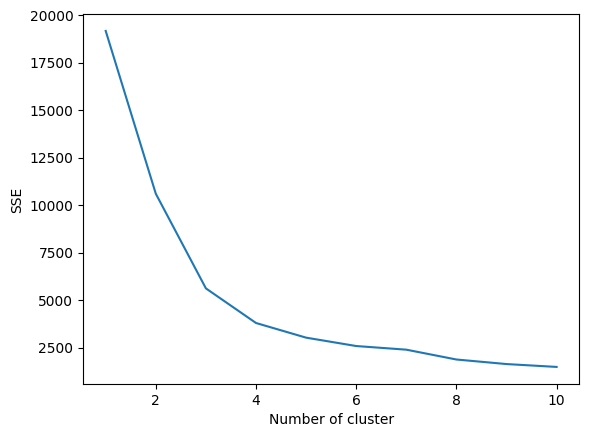

Merchant RESTAURANT_VOUCHER optimal k value is: 3
Processing account: ROASTERIE


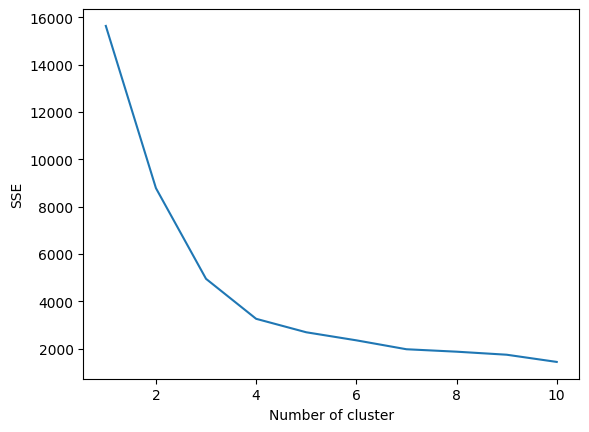

Merchant ROASTERIE optimal k value is: 3
Processing account: RUNNING_SHOP


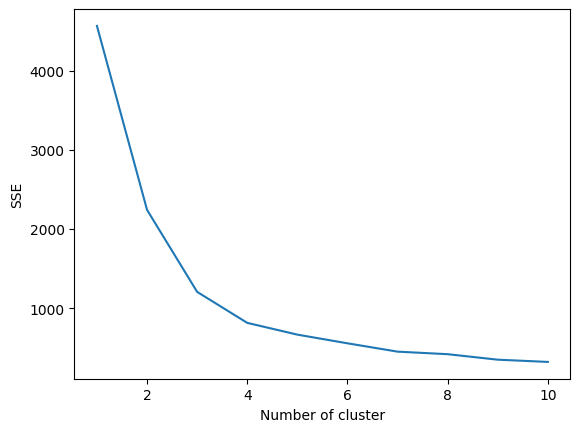

Merchant RUNNING_SHOP optimal k value is: 3
Processing account: SANDWICH_SHOP


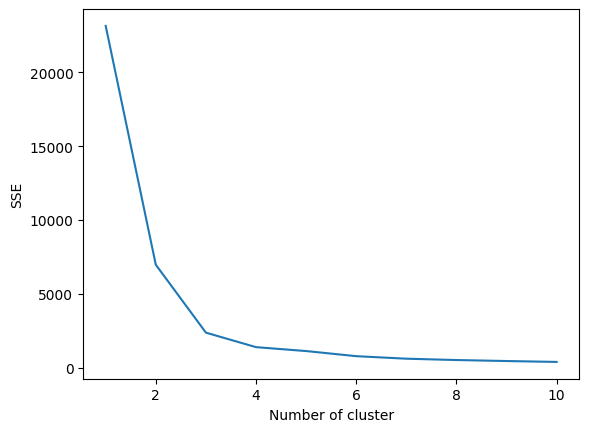

Merchant SANDWICH_SHOP optimal k value is: 3
Processing account: SCHOOL_SUPPLY_STORE


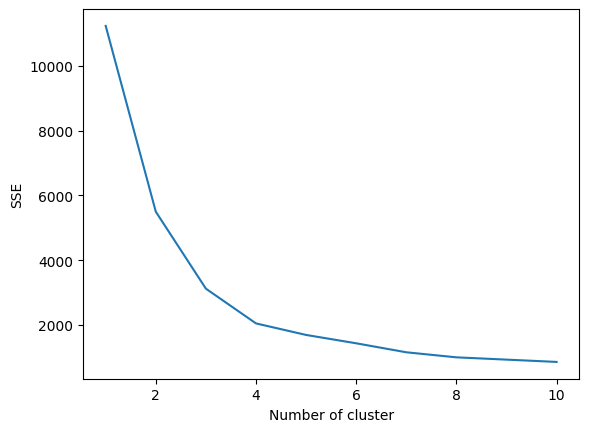

Merchant SCHOOL_SUPPLY_STORE optimal k value is: 3
Processing account: SEAFOOD_RESAURANT


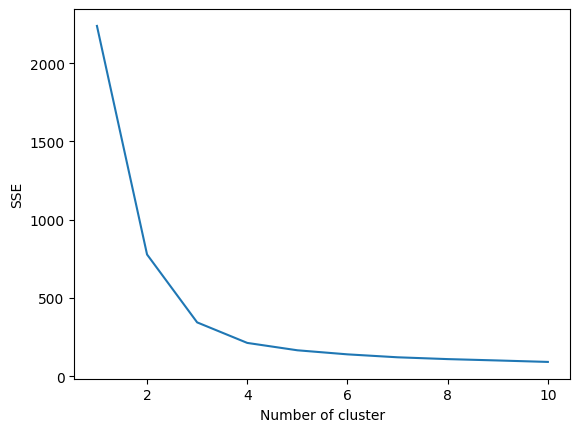

Merchant SEAFOOD_RESAURANT optimal k value is: 3
Processing account: SECOND_HAND_BOOKSHOP


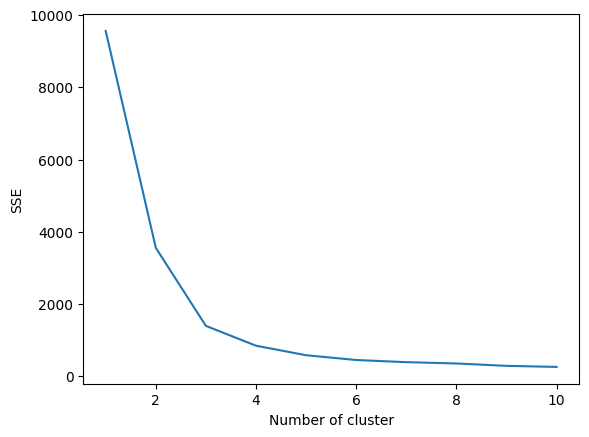

Merchant SECOND_HAND_BOOKSHOP optimal k value is: 3
Processing account: SPORT_SHOP


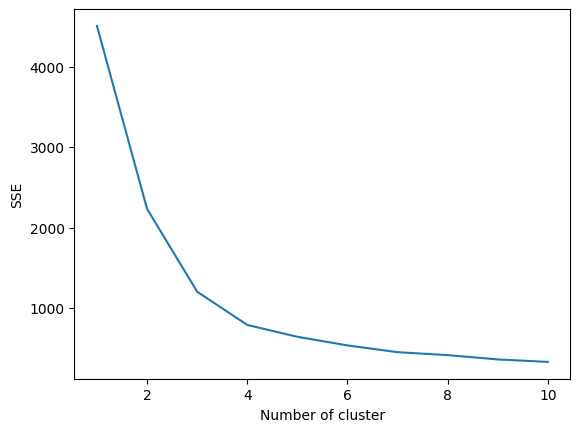

Merchant SPORT_SHOP optimal k value is: 3
Processing account: STEAK_HOUSE


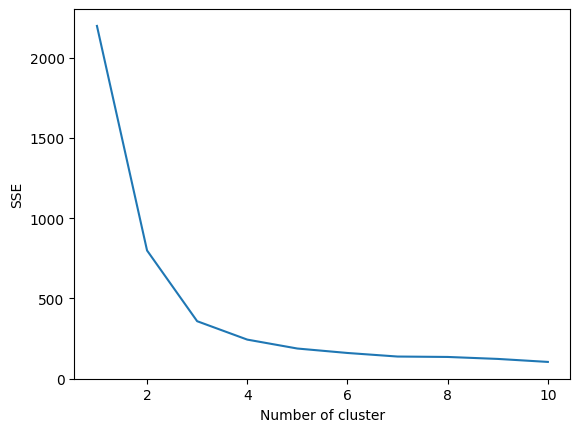

Merchant STEAK_HOUSE optimal k value is: 3
Processing account: STREAMING_SERVICE


D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\develop\MINI project\lib\site-packages\sklear

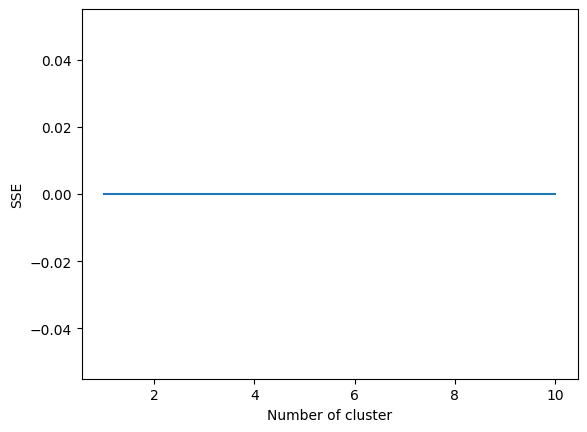

Merchant STREAMING_SERVICE optimal k value is: 3
Processing account: TAKEAWAY


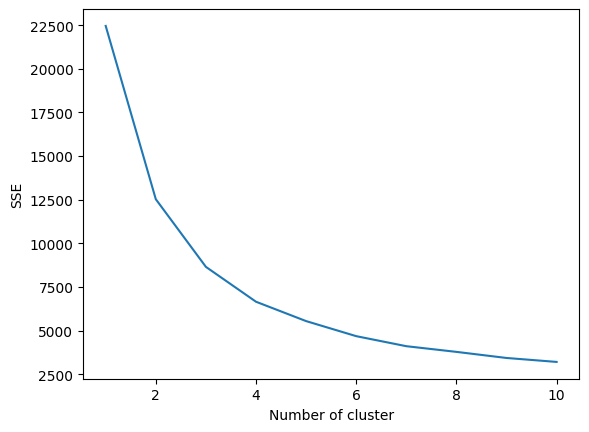

Merchant TAKEAWAY optimal k value is: 3
Processing account: TAKEAWAY_CURRY


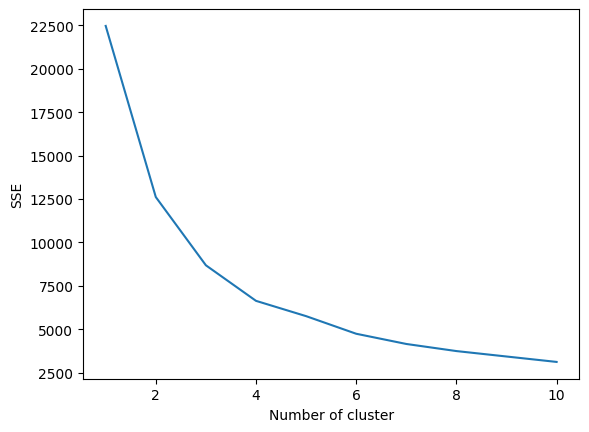

Merchant TAKEAWAY_CURRY optimal k value is: 3
Processing account: TEA_SHOP


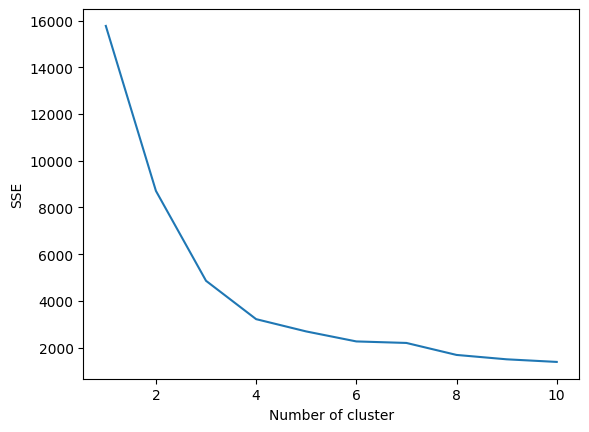

Merchant TEA_SHOP optimal k value is: 3
Processing account: TECH_SHOP


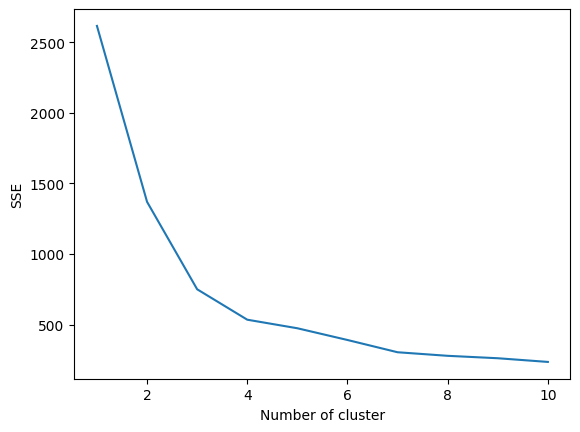

Merchant TECH_SHOP optimal k value is: 3
Processing account: THE_SUPERMARKET


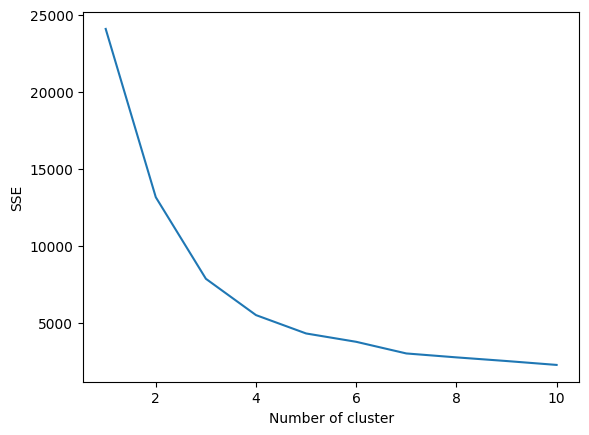

Merchant THE_SUPERMARKET optimal k value is: 3
Processing account: TOTALLY_A_REAL_COFFEE_SHOP


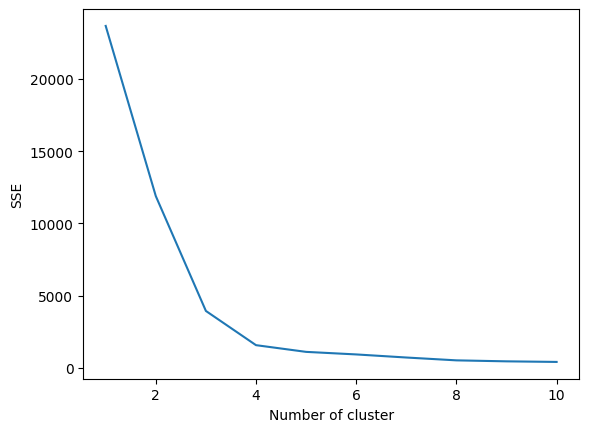

Merchant TOTALLY_A_REAL_COFFEE_SHOP optimal k value is: 3
Processing account: TOY_SHOP


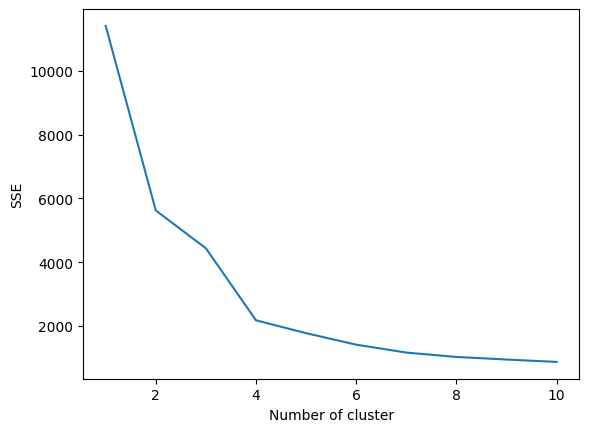

Merchant TOY_SHOP optimal k value is: 3
Processing account: TO_BEAN_OR_NOT_TO_BEAN


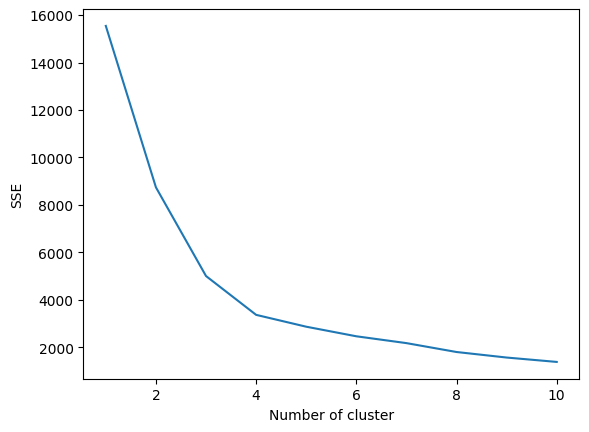

Merchant TO_BEAN_OR_NOT_TO_BEAN optimal k value is: 3
Processing account: TRAINER_SHOP


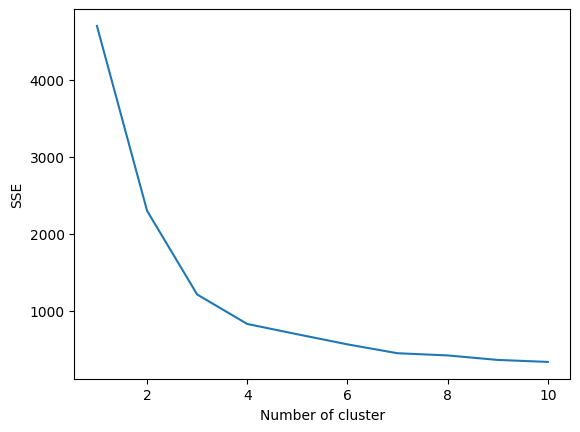

Merchant TRAINER_SHOP optimal k value is: 3
Processing account: TURKEY_FARM


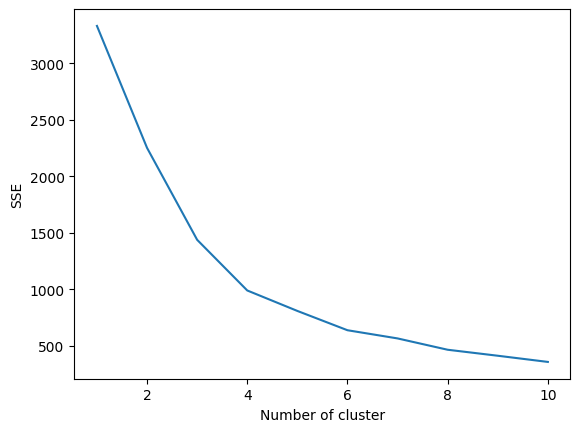

Merchant TURKEY_FARM optimal k value is: 3
Processing account: VIDEO_GAME_STORE


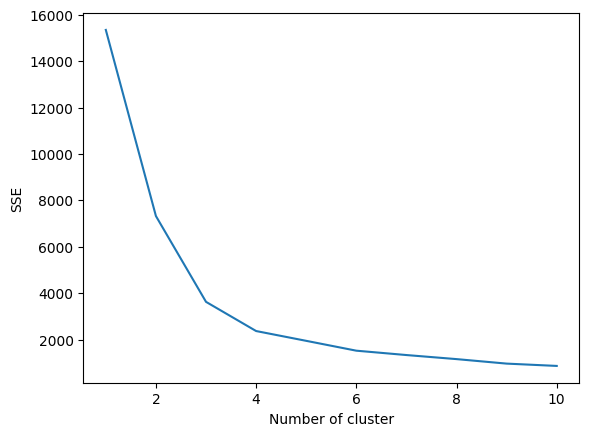

Merchant VIDEO_GAME_STORE optimal k value is: 3
Processing account: WE_HAVE_BEAN_WEIGHTING


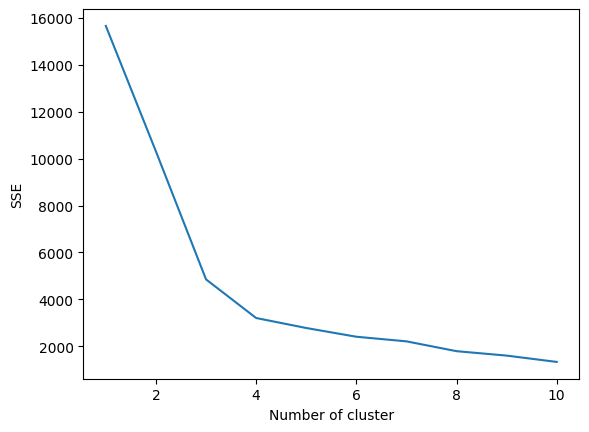

Merchant WE_HAVE_BEAN_WEIGHTING optimal k value is: 4
Processing account: WHISKEY_BAR


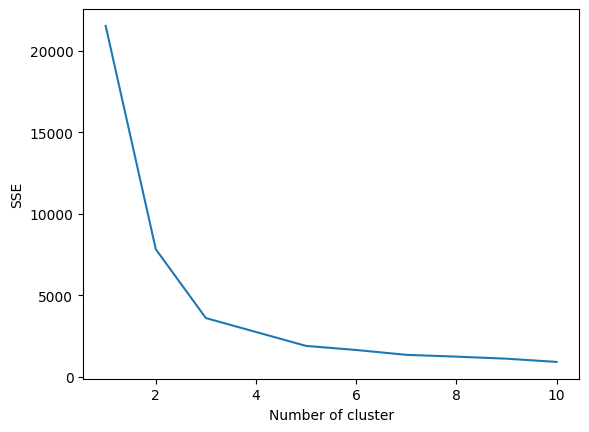

Merchant WHISKEY_BAR optimal k value is: 3
Processing account: WHISKEY_SHOP


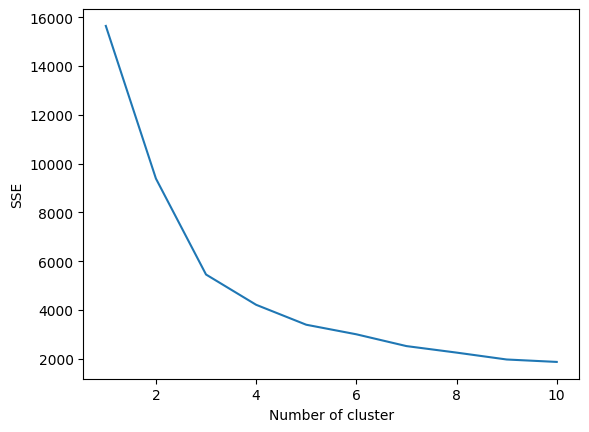

Merchant WHISKEY_SHOP optimal k value is: 3
Processing account: WINE_BAR


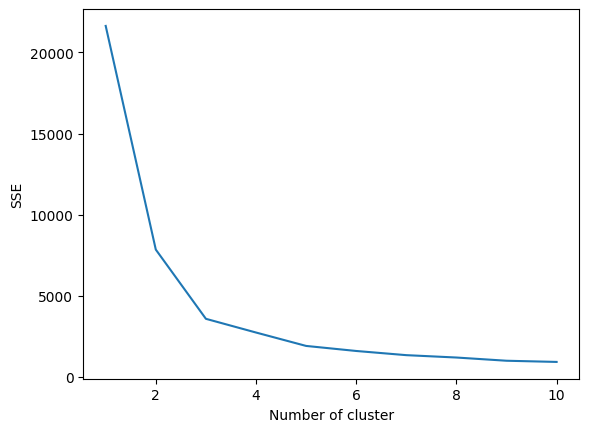

Merchant WINE_BAR optimal k value is: 3
Processing account: WINE_CELLAR


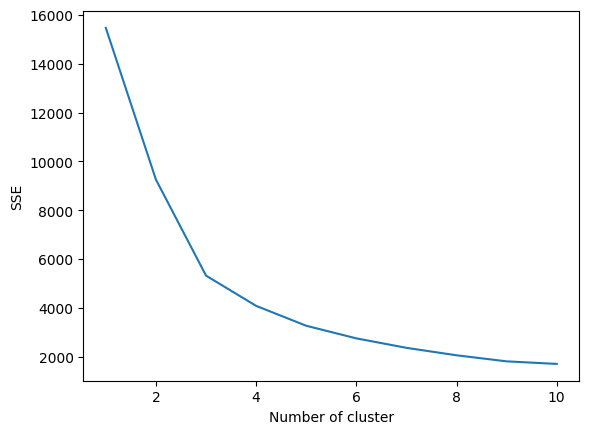

Merchant WINE_CELLAR optimal k value is: 3


In [137]:
rfm2 = sorted_df2.groupby(['to_randomly_generated_account', 'from_totally_fake_account']).agg({
    'not_happened_yet_date': lambda x: (current_date - x.max()).days,  # Recency
    'from_totally_fake_account': 'count',                                        # Frequency
    'monopoly_money_amount': 'sum'                                    # Monetary
}).rename(columns={
    'not_happened_yet_date': 'recency',
    'from_totally_fake_account': 'frequency',
    'monopoly_money_amount': 'monetary'
}).reset_index()

best_ks = {}
#Perform independent clustering analysis on each merchant
for account in rfm2['to_randomly_generated_account'].unique():
    print(f"Processing account: {account}")

#Filter data for specific merchants
    account_rfm2 = rfm2[rfm2['to_randomly_generated_account'] == account]

#Data preprocessing - Standardized RFM values
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(account_rfm2[['recency', 'frequency', 'monetary']])
# rfm_scaled = scaler.fit_transform(rfm2[['recency', 'frequency', 'monetary']])
#Initialize SSE dictionary to store SSE for each k value
    sse = {}

#Use Elbow Method to find the optimal K value and test K values from 1 to 10
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(rfm_scaled)
        sse[k] = kmeans.inertia_  # store SSE (Sum of Squared Errors)

#Draw a graph of SSE changing with k value
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel(f"Number of cluster for account {account}")
    plt.xlabel(f"Number of cluster")
    plt.ylabel("SSE")
    plt.show()
    sse_values = list(sse.values())  # Convert dictionary values to lists
    sse_differences = np.diff(sse_values)  # Calculate the first-order difference of a list
    best_k = np.argmax(-sse_differences) + 2 + 1  # Find the k value corresponding to the maximum negative difference and add 2 because the index starts from 0, while our k value starts from 1. Adding 1 more will result in the final K value
    # Print out the best k value
    print(f"Merchant {account} optimal k value is: {best_k}")

k_opt = 3  #This value is the inflection point value in the elbow diagram
#Applying K-Means clustering
kmeans = KMeans(n_clusters=k_opt, random_state=42)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm2[['recency', 'frequency', 'monetary']])
clusters = kmeans.fit_predict(rfm_scaled)
rfm2['Cluster'] = clusters
rfm2['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
from sklearn.metrics import silhouette_score

best_k_list = []
best_ks = {}
#Perform independent clustering analysis on each merchant
for account in rfm2['to_randomly_generated_account'].unique():
    print(f"Processing account: {account}")

#Filter data for specific merchants
    account_rfm2 = rfm2[rfm2['to_randomly_generated_account'] == account]

#Data preprocessing - Standardized RFM values
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(account_rfm2[['recency', 'frequency', 'monetary']])
    
    score = []
    
    # silhouette_score requires num_samples-1 > n_clusters
    num_samples = len(rfm_scaled)
    if num_samples > 10:
        n = 11
    else:
        n= num_samples
        
    for k in range(2, n):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(rfm_scaled)
        labels = kmeans.labels_
        if len(set(labels)) >= 2:
            score.append(silhouette_score(rfm_scaled, kmeans.labels_))
        else:
            score.append(-1)
            break
    # some merchants will obtain one label        
    if len(score) == 1:
        best_k = 1
    else:
        best_k = np.argmax(score) + 2
    # Print out the best k value
    print(f"Merchant {account} optimal k value is: {best_k}")
    
    best_k_list.append(best_k)

In [ ]:
# count the quantity of best_k
from collections import Counter
counter = Counter(best_k_list)
counter

In [ ]:
# get the mean of best_k
np.mean(best_k_list)

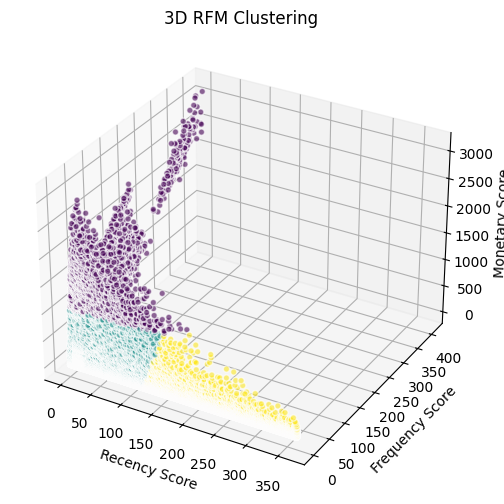

In [138]:
rfm_original = scaler.inverse_transform(rfm_scaled)

#Create a new graph and a 3D subgraph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#Assign data points to three-dimensional space
xs = rfm_original[:, 0]  # Recency
ys = rfm_original[:, 1]  # Frequency
zs = rfm_original[:, 2]  # Monetary

#Create a 3D scatter plot with colors defined by clustering labels
scatter = ax.scatter(xs, ys, zs, c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolors='w')

#Set chart titles and axis labels
ax.set_title('3D RFM Clustering')
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')

plt.show()

In [139]:
#Define clustering labels
cluster_labels = {
    0: 'High-Value Customers',
    1: 'Developing Customers',
    2: 'Low-Value/Risky Customers'
}

#Mapping labels to cluster numbers in DataFrame
rfm2['Cluster_Label'] = rfm2['Cluster'].map(cluster_labels)
rfm_Kmeans = rfm2[['to_randomly_generated_account', 'from_totally_fake_account', 'Cluster', 'Cluster_Label']]
print(rfm_Kmeans.head(1000).to_string(index=False))
rfm_Kmeans.to_csv('RFM_with_K_means_customer_groups.csv', index=False)

to_randomly_generated_account  from_totally_fake_account  Cluster             Cluster_Label
               ACCESSORY_SHOP                       1357        1      Developing Customers
               ACCESSORY_SHOP                       1607        1      Developing Customers
               ACCESSORY_SHOP                       1623        1      Developing Customers
               ACCESSORY_SHOP                       1828        1      Developing Customers
               ACCESSORY_SHOP                       1931        1      Developing Customers
               ACCESSORY_SHOP                       2090        1      Developing Customers
               ACCESSORY_SHOP                       2274        1      Developing Customers
               ACCESSORY_SHOP                       2719        1      Developing Customers
               ACCESSORY_SHOP                       2844        1      Developing Customers
               ACCESSORY_SHOP                       3017        1      Developin

In [140]:
filtered_df = sorted_df2[
    (sorted_df2['from_totally_fake_account'] ==  2710) &
    (sorted_df2['to_randomly_generated_account'] == 'A_CAFE')
]

# Now we can calculate the total money spent, the number of visits, and the date of the last visit.
total_money_spent = filtered_df['monopoly_money_amount'].sum()
number_of_visits = filtered_df.shape[0]
date_of_last_visit = filtered_df['not_happened_yet_date'].max()

total_money_spent, number_of_visits, date_of_last_visit

(9.3, 4, Timestamp('2025-07-09 00:00:00'))

In [141]:
high_value_customers = rfm_Kmeans[rfm_Kmeans['Cluster_Label'] == 'High-Value Customers']
print(high_value_customers.head(10000).to_string(index=False))
high_value_customers.to_csv('high_value_customers.csv', index=False)

to_randomly_generated_account  from_totally_fake_account  Cluster        Cluster_Label
                       A_CAFE                       1000        0 High-Value Customers
                       A_CAFE                       1006        0 High-Value Customers
                       A_CAFE                       1087        0 High-Value Customers
                       A_CAFE                       1214        0 High-Value Customers
                       A_CAFE                       1460        0 High-Value Customers
                       A_CAFE                       1490        0 High-Value Customers
                       A_CAFE                       1507        0 High-Value Customers
                       A_CAFE                       1563        0 High-Value Customers
                       A_CAFE                       1569        0 High-Value Customers
                       A_CAFE                       1607        0 High-Value Customers
                       A_CAFE              